# Credit Risk Project

## 1) Problem statement
This project determines whether a person can potentailly default his/her loan given their credit history, other financial attributes and personal data


## 2) Data Collection
- The data is downloaded from UCI website. source: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
- This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats. We are gonna work on original raw data. The other refined numeric can be found in the project data folder.

### 2.1 Importing data & required packages

Importing pandas, numpy, matplotlib, seaborn and warnings libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Reading Dataset and renaming columns as per word doc

In [94]:
df = pd.read_csv("../data/german.data", header=None, sep=" ")

In [95]:
df.columns = ["status_of_existing_checking_account", "duration_in_months", "credit_history", "purpose", "credit_amount", "savings_account_plus_bonds",
               "present_employment_since", "installment_rate_in_percentage_of_disposable_income", "personal_status_and_sex", "other_debtors_or_guarantors",
                 "present_residence_since", "property", "age_in_years", "other_installment_plans", "housing", "number_of_existing_credits_at_this_bank", "job",
                   "dependents", "telephone", "foreign_worker", "good_credit"]

#precision is important as per the word doc


Quick look at the data

In [96]:
df.head()

,status_of_existing_checking_account,duration_in_months,credit_history,purpose,credit_amount,savings_account_plus_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,dependents,telephone,foreign_worker,good_credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


shape of the dataset

In [97]:
df.shape

(1000, 21)

### 2.2 Dataset Information

In [98]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in cat_features:
    print(f"Categories in '{feature}': {set(df[feature].values)}")

print("\n")
print(f"There are {len(cat_features)} categorical features in total out of 20")

Categories in 'status_of_existing_checking_account': {'A11', 'A12', 'A13', 'A14'}
Categories in 'credit_history': {'A34', 'A32', 'A33', 'A30', 'A31'}
Categories in 'purpose': {'A41', 'A45', 'A42', 'A48', 'A44', 'A43', 'A46', 'A410', 'A49', 'A40'}
Categories in 'savings_account_plus_bonds': {'A62', 'A61', 'A65', 'A64', 'A63'}
Categories in 'present_employment_since': {'A72', 'A75', 'A71', 'A73', 'A74'}
Categories in 'personal_status_and_sex': {'A94', 'A91', 'A92', 'A93'}
Categories in 'other_debtors_or_guarantors': {'A101', 'A103', 'A102'}
Categories in 'property': {'A123', 'A122', 'A124', 'A121'}
Categories in 'other_installment_plans': {'A142', 'A143', 'A141'}
Categories in 'housing': {'A153', 'A152', 'A151'}
Categories in 'job': {'A173', 'A172', 'A171', 'A174'}
Categories in 'telephone': {'A191', 'A192'}
Categories in 'foreign_worker': {'A201', 'A202'}


There are 13 categorical features in total out of 20


What we know about data so far...
- 13 out of 20 are categorical columns
- 1000 records with 20+1 columns

This block will be updated after each step. Stay tuned!!!


## 3) Data Checks to perform
- Check Missing/NAN values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check missing values

In [99]:
df.isnull().sum()

status_of_existing_checking_account                    0
duration_in_months                                     0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_plus_bonds                             0
present_employment_since                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
other_debtors_or_guarantors                            0
present_residence_since                                0
property                                               0
age_in_years                                           0
other_installment_plans                                0
housing                                                0
number_of_existing_credits_at_this_bank                0
job                                                    0
dependents                     

There are no missing values

### 3.2 Check Duplicates

In [100]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### 3.3 Check Datatypes

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   status_of_existing_checking_account                  1000 non-null   object
 1   duration_in_months                                   1000 non-null   int64 
 2   credit_history                                       1000 non-null   object
 3   purpose                                              1000 non-null   object
 4   credit_amount                                        1000 non-null   int64 
 5   savings_account_plus_bonds                           1000 non-null   object
 6   present_employment_since                             1000 non-null   object
 7   installment_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 8   personal_status_and_sex                              1000 non-null   object
 9 

No NULL values found in the data :)

### 3.4 Number of unique values in each column

In [102]:
df.nunique()

status_of_existing_checking_account                      4
duration_in_months                                      33
credit_history                                           5
purpose                                                 10
credit_amount                                          921
savings_account_plus_bonds                               5
present_employment_since                                 5
installment_rate_in_percentage_of_disposable_income      4
personal_status_and_sex                                  4
other_debtors_or_guarantors                              3
present_residence_since                                  4
property                                                 4
age_in_years                                            53
other_installment_plans                                  3
housing                                                  3
number_of_existing_credits_at_this_bank                  4
job                                                     

In [103]:
df['good_credit'].unique()

array([1, 2], dtype=int64)

As expected numerical columns mostly have more unique values. Categorical variables have less unique values(<6 atmost). Therefore we can transform them using ONE HOT ENCODING.

### 3.5 Check statistics of dataset

In [104]:
df.describe()

,duration_in_months,credit_amount,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,dependents,good_credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


What we know about data so far...
- 13 out of 20 are categorical columns
- 1000 records with 20+1 columns
- No NULL values
- No duplicates
- No float datatypes. All numerical columns are integers.
- Categorical variables have less categories. It's a good sign from ML modelling perspective
- Minimum cdt amount is 250DM and max is 18424 DM.
- The oldest customer in the bank is 75 years old.

## 4) Exploratory Data Analysis(EDA)

In [105]:
df.head()

,status_of_existing_checking_account,duration_in_months,credit_history,purpose,credit_amount,savings_account_plus_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,dependents,telephone,foreign_worker,good_credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [106]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns[:-1] if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns[:-1] if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['duration_in_months', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'present_residence_since', 'age_in_years', 'number_of_existing_credits_at_this_bank', 'dependents']

We have 13 categorical features : ['status_of_existing_checking_account', 'credit_history', 'purpose', 'savings_account_plus_bonds', 'present_employment_since', 'personal_status_and_sex', 'other_debtors_or_guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


### 4.1 Univariate Analysis

#### 4.1.1 Target variable analysis

good_credit
1    700
2    300
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

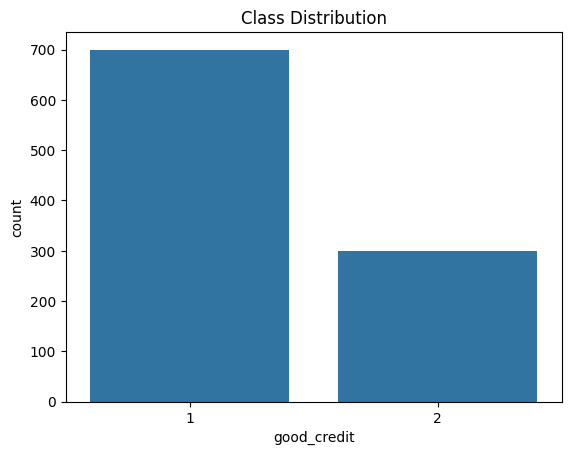

In [ ]:
print(df.good_credit.value_counts())
sns.countplot(x='good_credit', data=df)
plt.title("Class Distribution")

Negligible class imbalance

In [ ]:
df["gender"] = df["personal_status_and_sex"].apply(
    lambda x: "male" if x in ('A91', 'A93', 'A94') else "female"
)

def marital_status_check(record):
    if(record.gender == "male"):
        if(record.personal_status_and_sex == "A93"):
            return "single"
        elif(record.personal_status_and_sex == "A94"):
            return "married"
        else:
            return "divorced/separated"
    else:
        if(record.personal_status_and_sex == "A92"):
            return "divorced/separated"
        else:
            return "single"

df['marital_status'] = df.apply(marital_status_check, axis = 1)
df.drop(columns = ['personal_status_and_sex'], inplace=True)


#### 4.1.2 Univariate Analysis for Numerical variables

In [ ]:
def univariate_eda_for_numerical(df):
    summary = []

    for col in numeric_features:
        #miss = df[col].isna().mean()
        unique = df[col].nunique()
        desc = df[col].describe()
        skew = df[col].skew()
        summary.append([col, unique,
                            desc['mean'], desc['std'],
                            desc['min'], desc['50%'], desc['max'], skew])

        df[col].hist(bins=30, color = 'green')
        plt.title(f"distribution for {col}")
        plt.show()

    return pd.DataFrame(summary, columns = ['Numerical Column Name', 'Number of unique values', 'mean', 'standard deviation',
                                             'minimum', '50 percentile', 'maximum', 'skewness'])




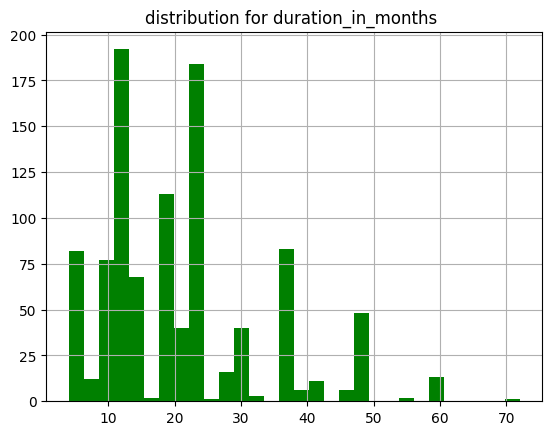

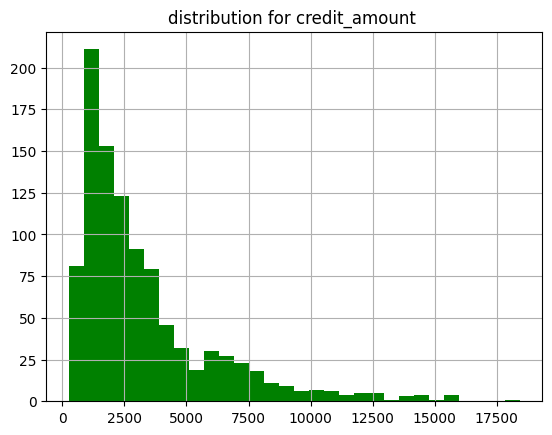

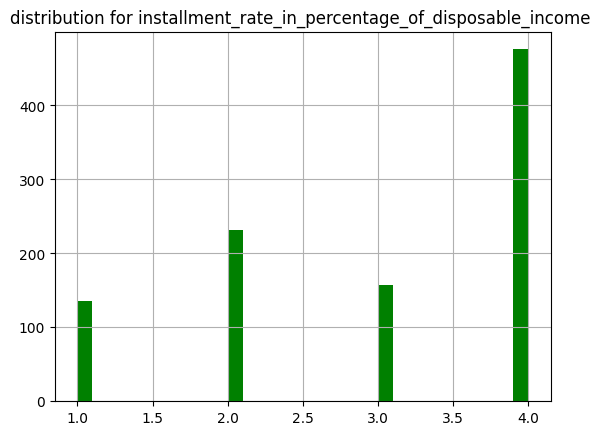

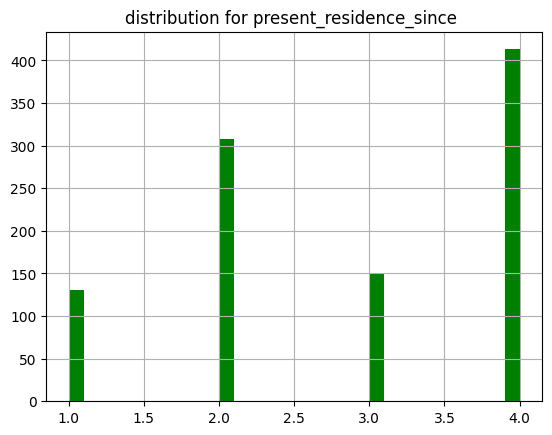

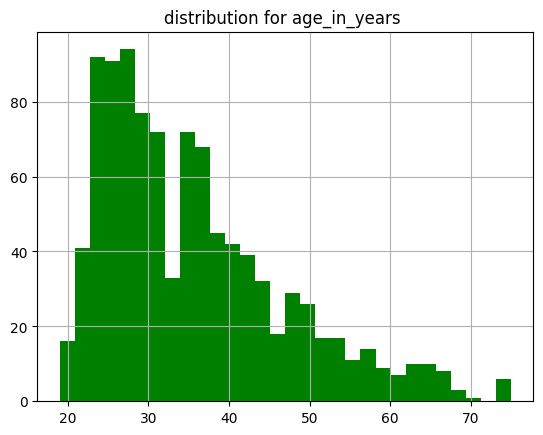

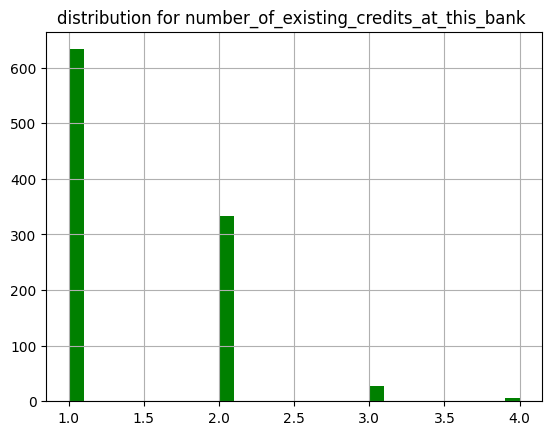

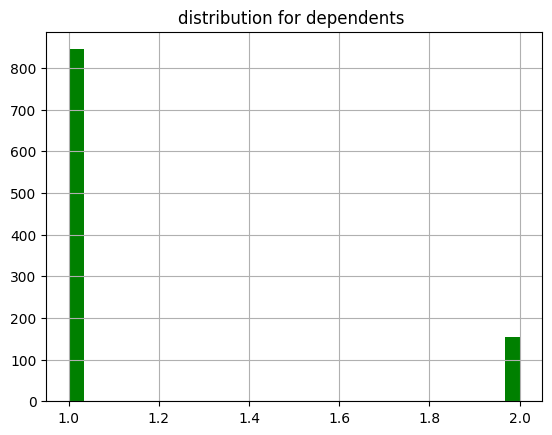

,Numerical Column Name,Number of unique values,mean,standard deviation,minimum,50 percentile,maximum,skewness
0,duration_in_months,33,20.903,12.058814,4.0,18.0,72.0,1.094184
1,credit_amount,921,3271.258,2822.736876,250.0,2319.5,18424.0,1.949628
2,installment_rate_in_percentage_of_disposable_i...,4,2.973,1.118715,1.0,3.0,4.0,-0.531348
3,present_residence_since,4,2.845,1.103718,1.0,3.0,4.0,-0.272570
4,age_in_years,53,35.546,11.375469,19.0,33.0,75.0,1.020739
5,number_of_existing_credits_at_this_bank,4,1.407,0.577654,1.0,1.0,4.0,1.272576
6,dependents,2,1.155,0.362086,1.0,1.0,2.0,1.909445


In [128]:
univariate_eda_for_numerical(df)

Conclusions:
- Numerical columns - Duration in months, credit amount, age in years are all right skewed. Its expected as per business standards.
- 

#### 4.1.2 Univariate Analysis for Categorical variables

In [124]:
def univariate_eda(df):
    summary = []

    for col in df.columns:
        miss = df[col].isna().mean()
        unique = df[col].nunique()

        if df[col].dtype in ['int64', 'float64']:
            desc = df[col].describe()
            skew = df[col].skew()
            summary.append([col, 'num', miss, unique,
                            desc['mean'], desc['std'],
                            desc['min'], desc['50%'], desc['max'], skew])

            df[col].hist(bins=30)
            plt.title(f"{col} distribution")
            plt.show()

        else:
            top = df[col].value_counts(normalize=True).head(3)
            summary.append([col, 'cat', miss, unique,
                            top.index.tolist(), top.values.tolist()])

            df[col].value_counts().plot(kind='bar')
            plt.title(f"{col} distribution")
            plt.show()

    return pd.DataFrame(summary)



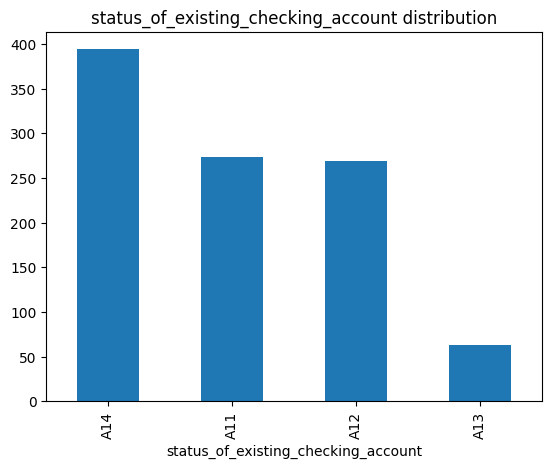

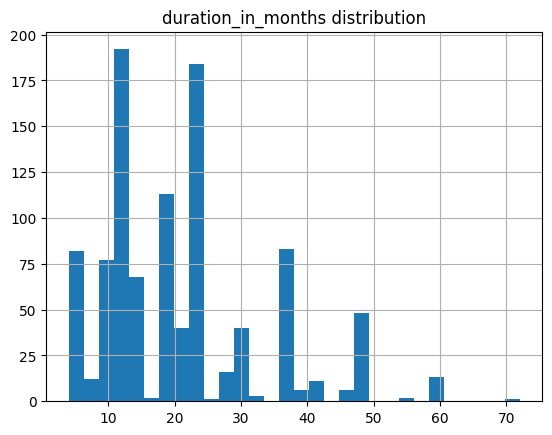

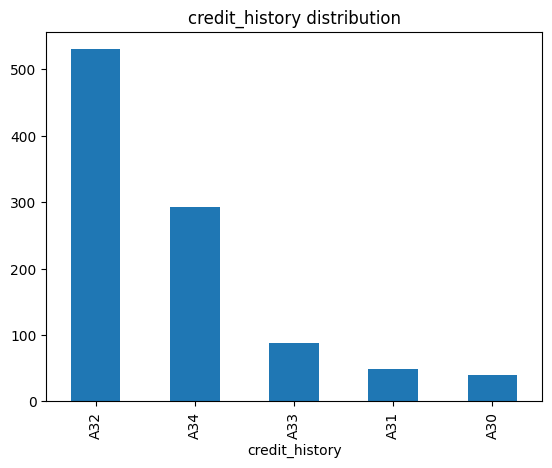

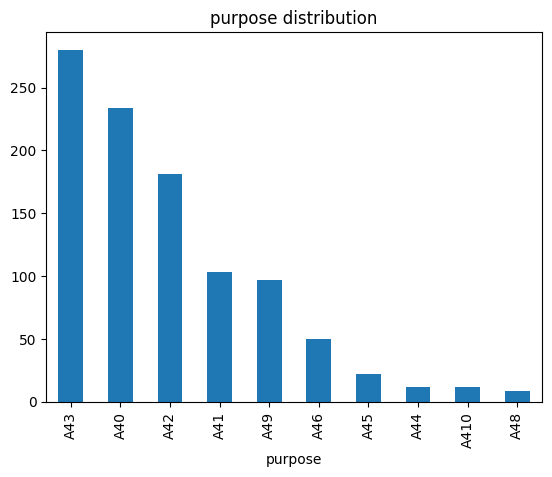

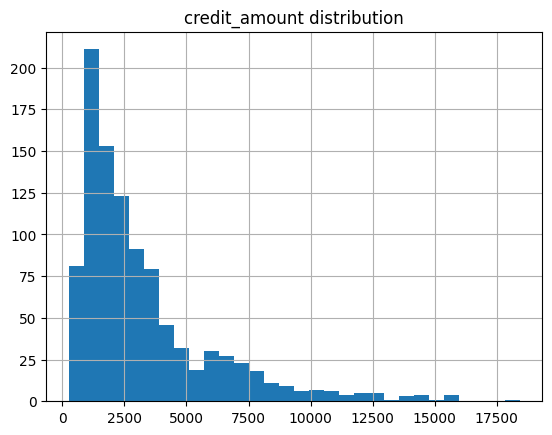

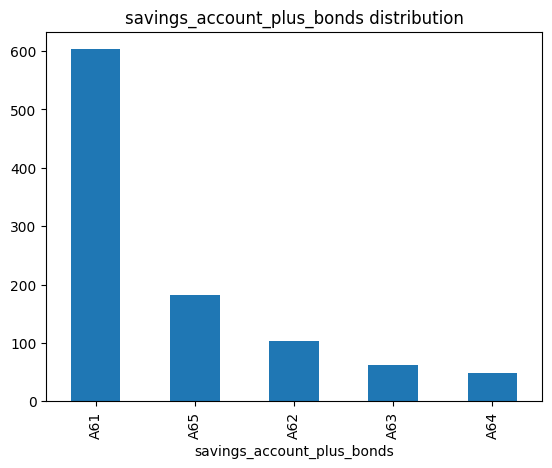

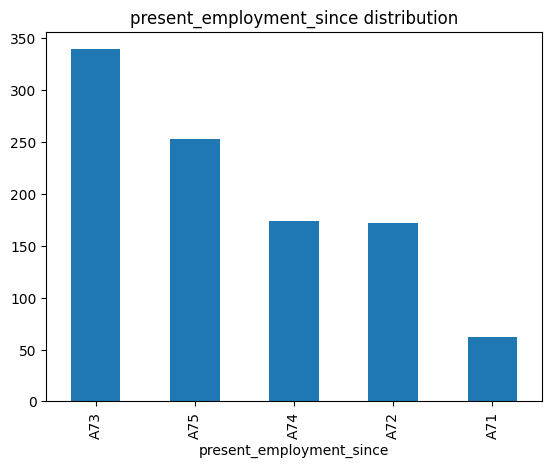

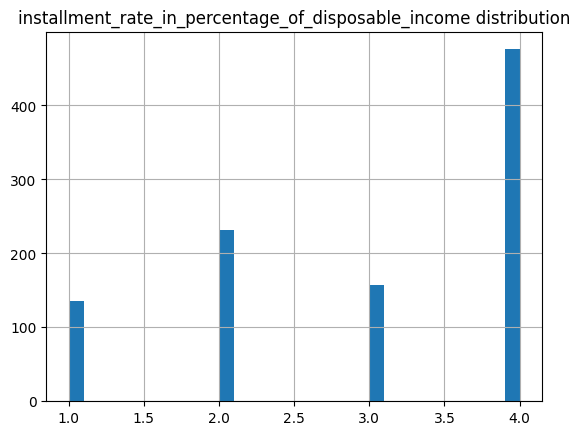

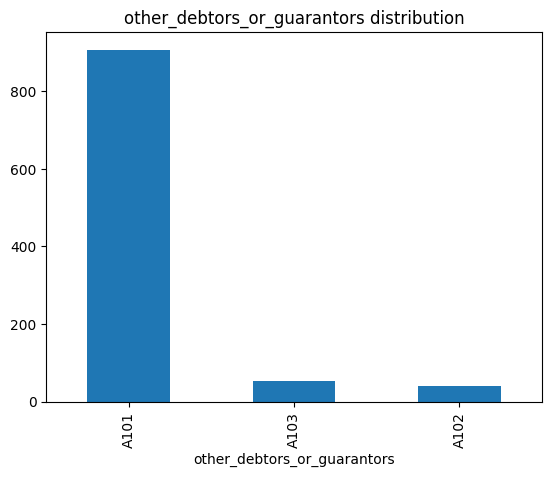

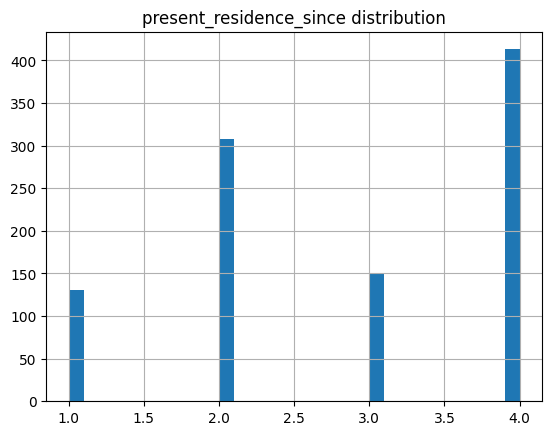

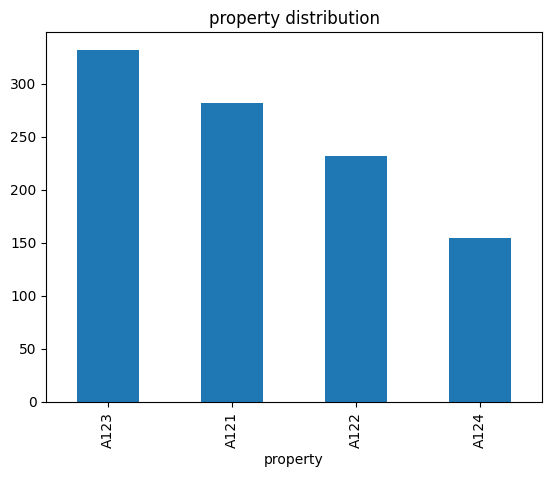

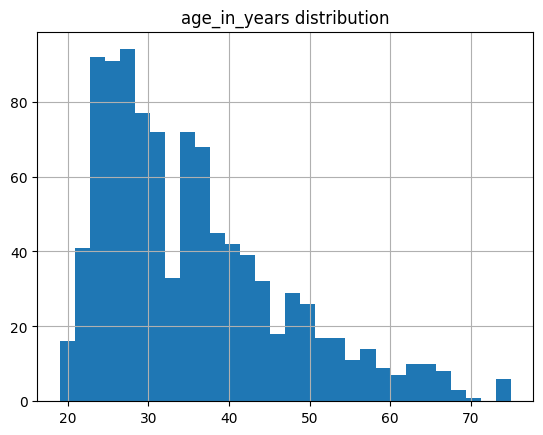

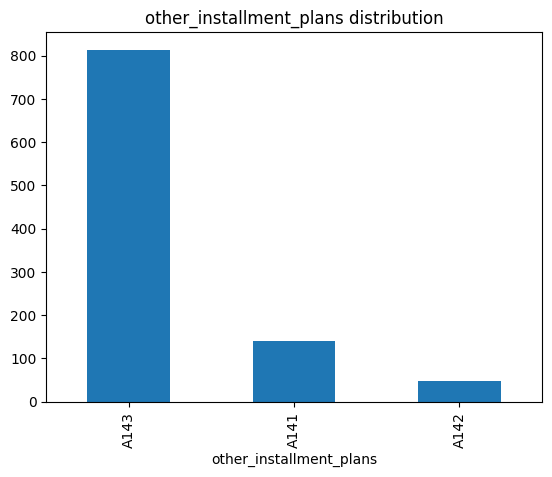

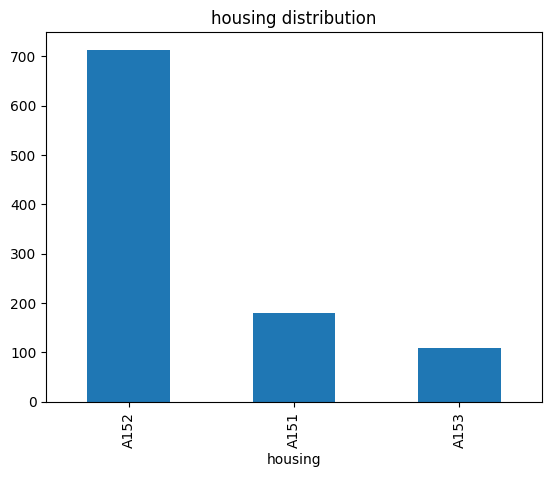

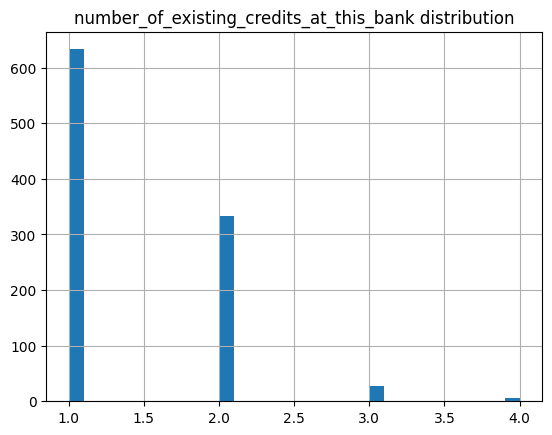

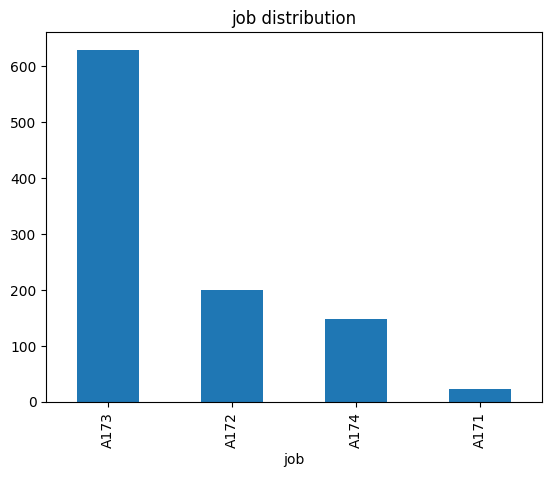

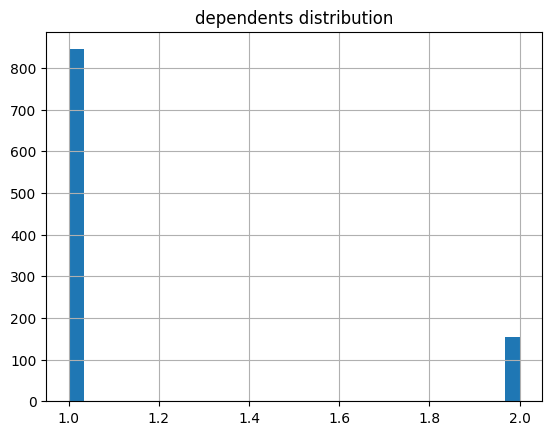

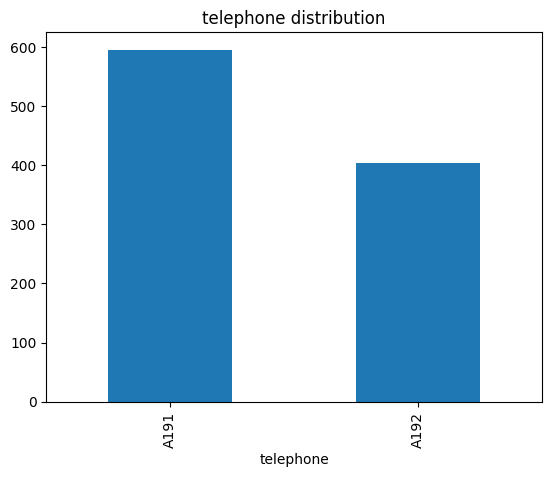

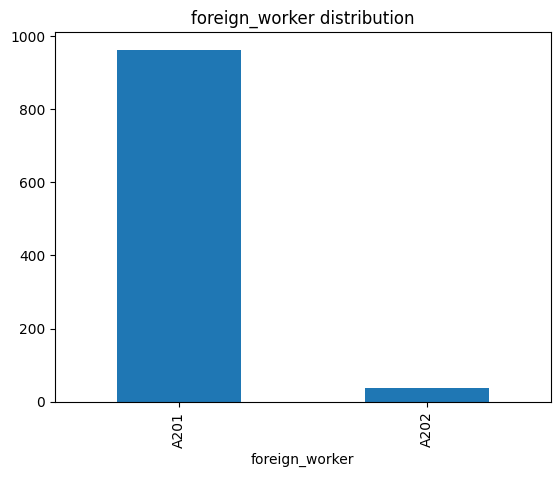

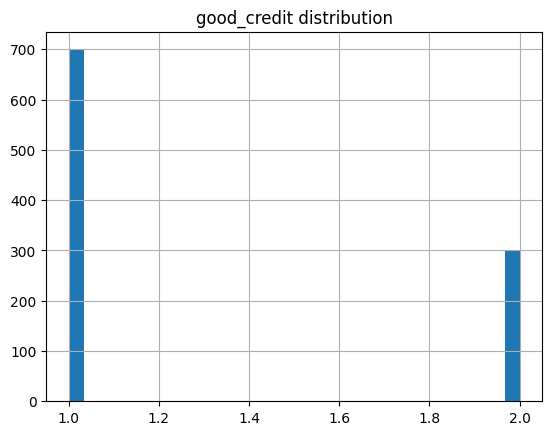

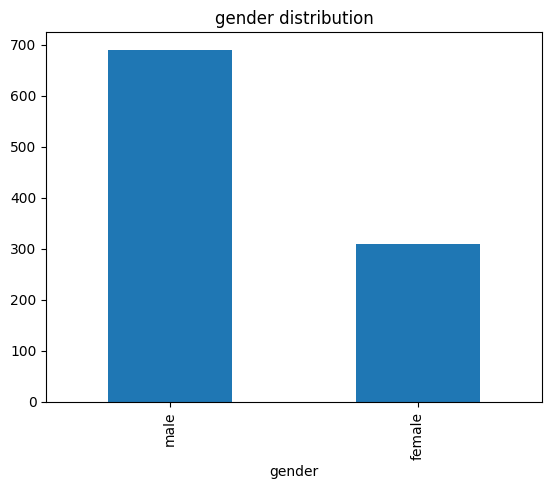

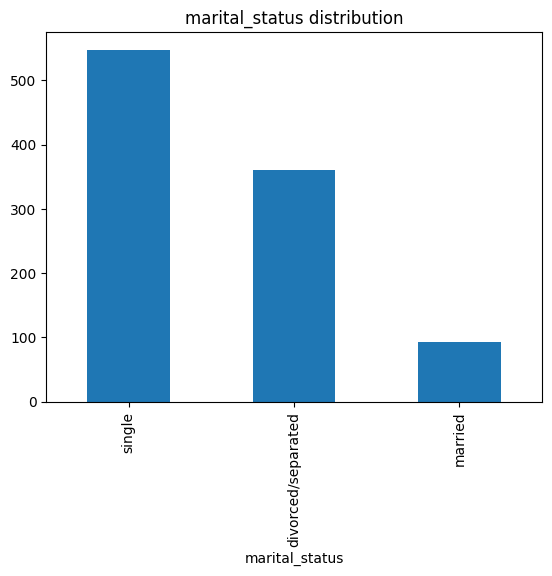

,0,1,2,3,4,5,6,7,8,9
0,status_of_existing_checking_account,cat,0.0,4,"[A14, A11, A12]","[0.394, 0.274, 0.269]",NaN,NaN,NaN,NaN
1,duration_in_months,num,0.0,33,20.903,12.058814,4.0,18.0,72.0,1.094184
2,credit_history,cat,0.0,5,"[A32, A34, A33]","[0.53, 0.293, 0.088]",NaN,NaN,NaN,NaN
3,purpose,cat,0.0,10,"[A43, A40, A42]","[0.28, 0.234, 0.181]",NaN,NaN,NaN,NaN
4,credit_amount,num,0.0,921,3271.258,2822.736876,250.0,2319.5,18424.0,1.949628
5,savings_account_plus_bonds,cat,0.0,5,"[A61, A65, A62]","[0.603, 0.183, 0.103]",NaN,NaN,NaN,NaN
6,present_employment_since,cat,0.0,5,"[A73, A75, A74]","[0.339, 0.253, 0.174]",NaN,NaN,NaN,NaN
7,installment_rate_in_percentage_of_disposable_i...,num,0.0,4,2.973,1.118715,1.0,3.0,4.0,-0.531348
8,other_debtors_or_guarantors,cat,0.0,3,"[A101, A103, A102]","[0.907, 0.052, 0.041]",NaN,NaN,NaN,NaN
9,present_residence_since,num,0.0,4,2.845,1.103718,1.0,3.0,4.0,-0.272570


In [125]:
univariate_eda(df)